In [1]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt


# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal

In [2]:
#downloading data
!wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"

--2024-01-05 17:16:18--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4549 (4.4K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.44K  --.-KB/s    in 0s      

2024-01-05 17:16:18 (55.6 MB/s) - ‘iris.csv’ saved [4549/4549]



In [3]:
#loading data
data = pd.read_csv('iris.csv')

In [4]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
#choosing feature and target variables
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [6]:
#str to int
from sklearn.preprocessing import LabelEncoder

y= LabelEncoder().fit_transform(y)

In [7]:
#splitting dataset for training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 0)

In [8]:
X_train.shape

(99, 4)

In [9]:
X_test.shape

(50, 4)

In [10]:
y_train.shape

(99,)

In [11]:
y_test.shape

(50,)

In [12]:
#creating model
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(12, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dropout(0.01),
        keras.layers.Dense(3, activation='softmax')
    ])

    return model

In [13]:
model = get_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 323 (1.26 KB)
Trainable params: 323 (1.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#compile model
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=150,batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150
4/4 [==============================] - 6s 207ms/step - loss: 5.8415 - accuracy: 0.3535 - val_loss: 5.9553 - val_accuracy: 0.3000
Epoch 2/150
4/4 [==============================] - 0s 37ms/step - loss: 5.3493 - accuracy: 0.3535 - val_loss: 5.4415 - val_accuracy: 0.3000
Epoch 3/150
4/4 [==============================] - 0s 28ms/step - loss: 4.8865 - accuracy: 0.3535 - val_loss: 4.9491 - val_accuracy: 0.3000
Epoch 4/150
4/4 [==============================] - 0s 27ms/step - loss: 4.3802 - accuracy: 0.3535 - val_loss: 4.4783 - val_accuracy: 0.3000
Epoch 5/150
4/4 [==============================] - 0s 46ms/step - loss: 3.9487 - accuracy: 0.3535 - val_loss: 4.0293 - val_accuracy: 0.3000
Epoch 6/150
4/4 [==============================] - 0s 26ms/step - loss: 3.6056 - accuracy: 0.3535 - val_loss: 3.6116 - val_accuracy: 0.3000
Epoch 7/150
4/4 [==============================] - 0s 30ms/step - loss: 3.2615 - accuracy: 0.3535 - val_loss: 3.2109 - val_accuracy: 0.3000
Epoch 8/150
4/4 [==

In [17]:
#model evaluation
model.evaluate(X_test, y_test, verbose=0)

[0.2453453093767166, 0.9800000190734863]

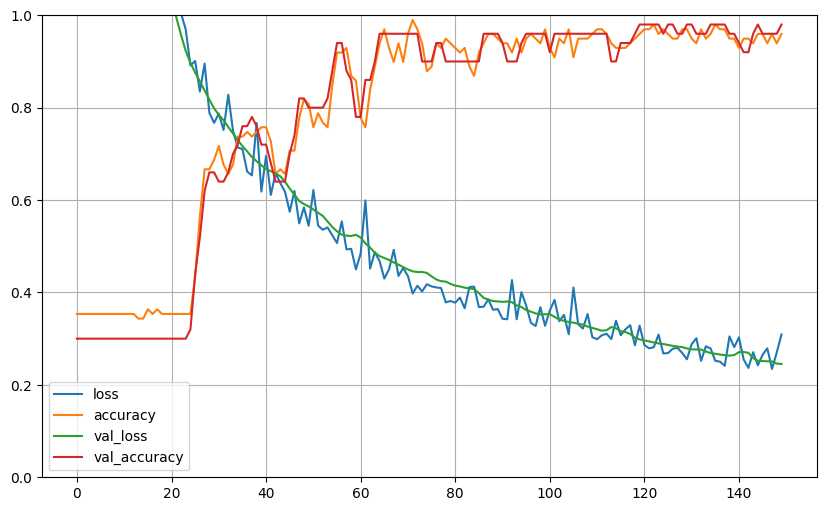

In [18]:
#loss and accuracy vs epchs graph
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:.2f}%'.format(acc*100))

Test Accuracy: 98.00%
